In [1]:
sys.path.append('../')

%load_ext autoreload
%autoreload 2

import glob
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import pandas as pd
import seaborn as sns

from IPython.display import Image, display

sns.set()

In [2]:
SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
paper_folder = '../../paper_content/'

result_root = '../../results/baseline/'
subset = 'subset_100.0'
results = {}
paths = glob.glob(result_root + '**/**/' + subset)
for p in paths:
    results[p.split('/')[-3]] = p

In [4]:
acc_values = {}
for dataset in sorted(results):
    print(dataset)
    #display(Image(os.path.join(results[dataset], 'Modified_Accuracies_Matrix.png')))
    with open(os.path.join(results[dataset], 'Modified_Accuracies_Matrix.txt'), 'r') as f:
        if dataset == 'anomaly_new':
            dataset = 'Anomaly'
        acc_values[dataset] = json.loads(str(f.readline().replace('\'', '\"')[1:-1]))

AsphaltPavementType
AsphaltRegularity
Crop
ElectricDevices
HandOutlines
MedicalImages
MelbournePedestrian
NonInvasiveFetalECGThorax1
PhalangesOutlinesCorrect
Strawberry
Wafer


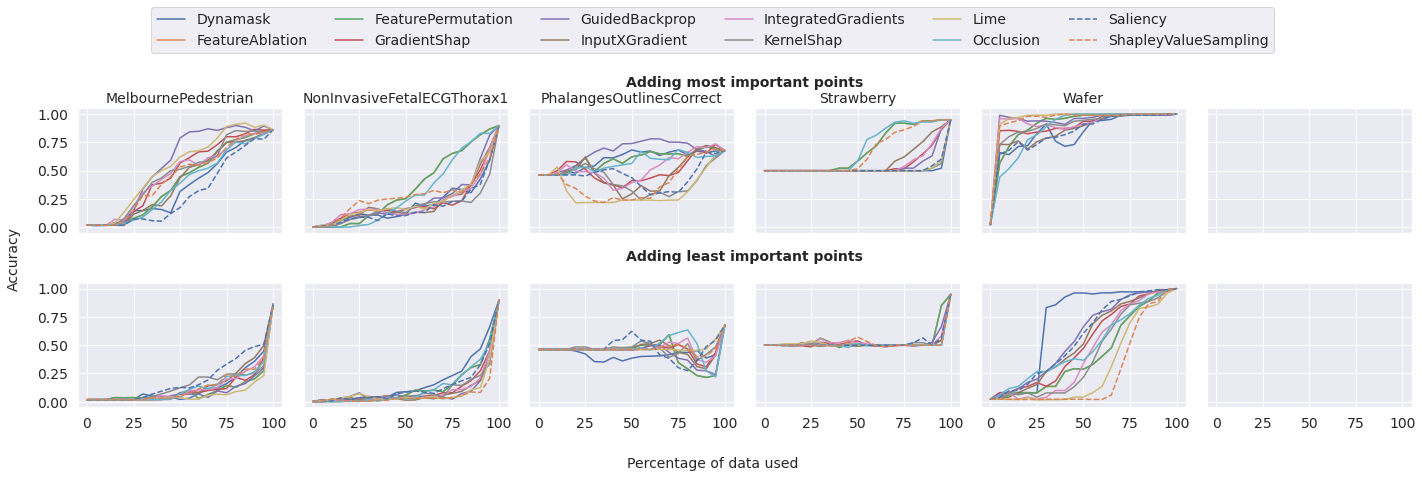

In [13]:
fig, ax = plt.subplots(figsize=(20, 6), nrows=2, ncols=6, sharex=True, sharey=True)
axes = ax.flat
for di, d in enumerate(sorted(acc_values)):
    axes[di].set_title(d)
    for mi, m in enumerate(sorted(acc_values[d]['larger']['accs'])):
        if di == 0:
            axes[di].plot(acc_values[d]['larger']['percs'], acc_values[d]['larger']['accs'][m], linestyle='solid' if mi < 10 else 'dashed', label=m)
        else:
            axes[di].plot(acc_values[d]['larger']['percs'], acc_values[d]['larger']['accs'][m], linestyle='solid' if mi < 10 else 'dashed')
        axes[di+6].plot(acc_values[d]['smaller']['percs'], acc_values[d]['smaller']['accs'][m], linestyle='solid' if mi < 10 else 'dashed')
    
        #axes[di].set_xticks(np.linspace(0, 100, 5))
        #axes[di+6].set_xticks(np.linspace(0, 100, 5))
fig.supxlabel('Percentage of data used')
fig.supylabel('Accuracy', x=0.01)
fig.legend(loc='upper center', bbox_to_anchor=(.5, 1.1), ncol=6)

plt.xticks(np.linspace(0, 100, 5))
plt.yticks(np.linspace(0, 1, 5))

def create_subtitle(fig, grid, title):
    "Sign sets of subplots with title"
    row = fig.add_subplot(grid)
    row.set_title(f'{title}\n', fontweight='semibold')
    row.set_frame_on(False)
    row.axis('off')

grid = plt.GridSpec(2, 6)
create_subtitle(fig, grid[0, ::], 'Adding most important points')
create_subtitle(fig, grid[1, ::], 'Adding least important points')

plt.tight_layout()
fname = os.path.join(paper_folder, 'Accuracy_drops.png')
fig.savefig(fname, dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()

In [7]:
inf_values = {}
for dataset in sorted(results):
    print(dataset)
    #display(Image(os.path.join(results[dataset], 'Infidelity.png')))
    with open(os.path.join(results[dataset], 'Infidelity.txt'), 'r') as f:
        if dataset == 'anomaly_new':
            dataset = 'Anomaly'
        inf_values[dataset] = json.loads(str(f.readline().replace('\'', '\"')[1:-1]))

CharacterTrajectories
ECG5000
FaceDetection
FordA
UWaveGestureLibraryAll
anomaly_new


In [8]:
inf_values_sub = {}
for d in sorted(inf_values):
    inf_values_sub[d] = {}
    for m in sorted(inf_values[d]):
        inf_values_sub[d][m] = {}
        for s in sorted(inf_values[d][m]):
            if s in ['B']:
                inf_values_sub[d][m][s] = inf_values[d][m][s]
inf_values = inf_values_sub

In [8]:
tab_str = 'Method & '
for d in sorted(inf_values):
    tab_str = tab_str + d + ' & '
tab_str = tab_str[:-2] + '\\\\\n'
for m in sorted(inf_values[d]):
    for s in sorted(inf_values[d][m]):
        tab_str = tab_str + m + ' & '# + s + ' & '
        for d in sorted(inf_values):
            tab_str = tab_str + '${:.4f}$'.format(inf_values[d][m][s]) + ' & '
        tab_str = tab_str[:-2] + '\\\\\n'
    #tab_str = tab_str[:-2] + '\\\\\n'
print(tab_str)

Method & Anomaly & CharacterTrajectories & ECG5000 & FaceDetection & FordA & UWaveGestureLibraryAll \\
Dynamask & $2.4382$ & $1.2650$ & $0.8271$ & $0.0013$ & $1.3806$ & $11.6034$ \\
FeatureAblation & $2.3859$ & $1.1513$ & $0.8459$ & $0.0014$ & $1.3869$ & $11.5511$ \\
FeaturePermutation & $2.4015$ & $1.1654$ & $0.7949$ & $0.0014$ & $1.3991$ & $11.5112$ \\
GradientShap & $2.3803$ & $1.1408$ & $0.7897$ & $0.0014$ & $1.3734$ & $11.4717$ \\
GuidedBackprop & $2.4057$ & $1.1665$ & $0.8060$ & $0.0014$ & $1.3782$ & $11.6886$ \\
InputXGradient & $2.3056$ & $1.1475$ & $0.8135$ & $0.0014$ & $1.3854$ & $11.5830$ \\
IntegratedGradients & $2.3594$ & $1.2064$ & $0.8260$ & $0.0013$ & $1.3537$ & $11.3763$ \\
KernelShap & $2.4115$ & $1.1802$ & $0.8288$ & $0.0014$ & $1.3785$ & $11.6568$ \\
Lime & $2.4259$ & $1.1584$ & $0.8040$ & $0.0014$ & $1.3732$ & $11.6323$ \\
Occlusion & $2.3430$ & $1.2078$ & $0.8107$ & $0.0014$ & $1.3752$ & $11.3569$ \\
Saliency & $2.3788$ & $1.0921$ & $0.8174$ & $0.0014$ & $1.3636$ 

In [9]:
sens_values = {}
for dataset in sorted(results):
    print(dataset)
    #display(Image(os.path.join(results[dataset], 'Attribution_sensitivity.png')))
    with open(os.path.join(results[dataset], 'Attribution_sensitivity.txt'), 'r') as f:
        if dataset == 'anomaly_new':
            dataset = 'Anomaly'
        s = str(f.readline().replace('\'', '\"').replace('nan', '-1')[1:-1])
        try:
            sens_values[dataset] = json.loads(s)
        except:
            sens_values[dataset] = json.loads(s[:-1])

CharacterTrajectories
ECG5000
FaceDetection
FordA
UWaveGestureLibraryAll
anomaly_new


In [10]:
tab_str = 'Method & '
for d in sorted(sens_values):
    tab_str = tab_str + d + ' & '
tab_str = tab_str[:-2] + '\\\\\n'
for m in sorted(sens_values[d]):
    tab_str = tab_str + m + ' & '
    for d in sorted(sens_values):
        tab_str = tab_str + '${:.4f}$'.format(sens_values[d][m]) + ' & '
    tab_str = tab_str[:-2] + '\\\\\n'
print(tab_str)

Method & Anomaly & CharacterTrajectories & ECG5000 & FaceDetection & FordA & UWaveGestureLibraryAll \\
Dynamask & $0.0000$ & $0.0000$ & $0.0000$ & $0.0000$ & $0.0000$ & $0.0000$ \\
FeatureAblation & $0.0414$ & $0.0360$ & $0.0350$ & $0.0581$ & $0.0463$ & $0.0444$ \\
FeaturePermutation & $0.0414$ & $0.0360$ & $0.0350$ & $0.0581$ & $0.0463$ & $0.0444$ \\
GradientShap & $0.9364$ & $0.6610$ & $0.9149$ & $0.9764$ & $1.0369$ & $1.0347$ \\
GuidedBackprop & $0.1324$ & $0.1531$ & $0.0562$ & $0.1339$ & $0.0398$ & $0.2057$ \\
InputXGradient & $0.1890$ & $0.1017$ & $0.0709$ & $0.0952$ & $0.0924$ & $0.1927$ \\
IntegratedGradients & $0.1166$ & $0.1144$ & $0.0458$ & $0.0419$ & $0.0906$ & $0.2086$ \\
KernelShap & $1.0908$ & $0.9405$ & $0.2162$ & $0.9248$ & $0.8876$ & $1.0283$ \\
Lime & $0.8221$ & $0.4986$ & $0.1408$ & $1.5613$ & $0.6974$ & $0.6378$ \\
Occlusion & $0.0645$ & $0.0167$ & $0.0305$ & $0.0506$ & $0.0254$ & $0.0352$ \\
Saliency & $0.1902$ & $0.1126$ & $0.1841$ & $0.0995$ & $0.0762$ & $0.2220$

In [11]:
time_values = {}
for dataset in sorted(results):
    print(dataset)
    #display(Image(os.path.join(results[dataset], 'Attribution_time.png')))
    with open(os.path.join(results[dataset], 'Attribution_time.txt'), 'r') as f:
        if dataset == 'anomaly_new':
            dataset = 'Anomaly'
        time_values[dataset] = json.loads(str(f.readline().replace('\'', '\"').replace('nan', '-1')[1:-1]))

CharacterTrajectories
ECG5000
FaceDetection
FordA
UWaveGestureLibraryAll
anomaly_new


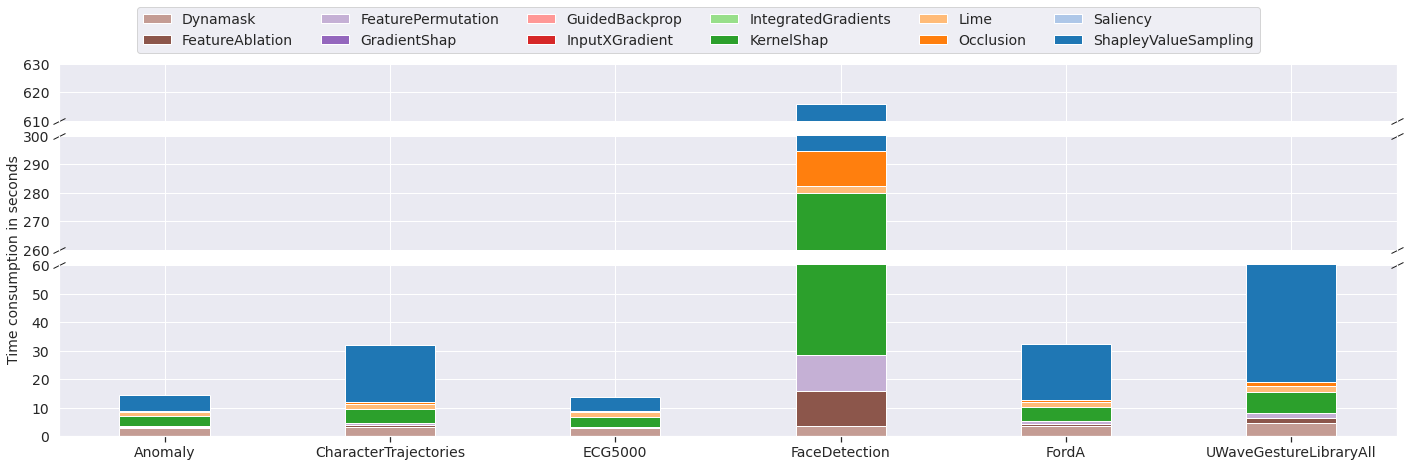

In [20]:
fig, ax = plt.subplots(figsize=(20, 6), nrows=3, ncols=1, sharex=True, gridspec_kw={'height_ratios': [1, 2, 3]})
columns = sorted(time_values)
rows = sorted(time_values[columns[0]])
colors = plt.cm.tab20(np.arange(len(rows)))
index = np.arange(len(columns)) + 0.3
bar_width = 0.4
y_offset = np.zeros(len(columns))
for row, m in enumerate(rows):
    values = [time_values[d][m] for d in columns]
    ax[0].bar(columns, values, bar_width, bottom=y_offset, color=colors[::-1][row], label=m)
    for a in ax[1:]:
        a.bar(columns, values, bar_width, bottom=y_offset, color=colors[::-1][row])
    y_offset = y_offset + values
ax[0].set_ylim(610, 630) # outliers only
ax[1].set_ylim(260, 300) # outliers only
ax[2].set_ylim(0, 60)
#ax[3].set_ylim(0, 20)

for a in ax:
    a.spines.bottom.set_visible(False)
    a.spines.top.set_visible(False)
ax[-1].spines.bottom.set_visible(True)

ax[-1].xaxis.tick_bottom()

d = .5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax[0].plot([0, 1], [0, 0], transform=ax[0].transAxes, **kwargs)
for a in ax[1:-1]:
    a.plot([0, 1], [1, 1], transform=a.transAxes, **kwargs)
    a.plot([0, 1], [0, 0], transform=a.transAxes, **kwargs)
ax[-1].plot([0, 1], [1, 1], transform=ax[-1].transAxes, **kwargs)

fig.supylabel('Time consumption in seconds')

fig.legend(loc='upper center', bbox_to_anchor=(.5, 1.1), ncol=6)

plt.tight_layout(h_pad=0.05)
fname = os.path.join(paper_folder, 'Time_comparison.png')
fig.savefig(fname, dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()

In [4]:
corr_values = {}
corr_confs = ['jaccard_perc-10.0', 'pearsonr_perc-100.0', 'spearmanr_perc-100.0']
for dataset in sorted(results):
    print(dataset)
    #display(Image(os.path.join(results[dataset], 'Correlation_Matrix_jaccard_perc-10.0_key-B.png')))
    dataset_real = dataset
    if dataset == 'anomaly_new':
        dataset = 'Anomaly'
    corr_values[dataset] = {}
    for conf in corr_confs:
        setting = 'Correlation_Matrix_' +  conf + '_key-B.txt'
        if conf not in list(corr_values):
            corr_values[dataset][conf] = {}
        with open(os.path.join(results[dataset_real], setting), 'r') as f:
            corr_values[dataset][conf] = json.loads(str(f.readline().replace('\'', '\"').replace('nan', '-1')[1:-1]))

CharacterTrajectories
ECG5000
FaceDetection
FordA
UWaveGestureLibraryAll
anomaly_new


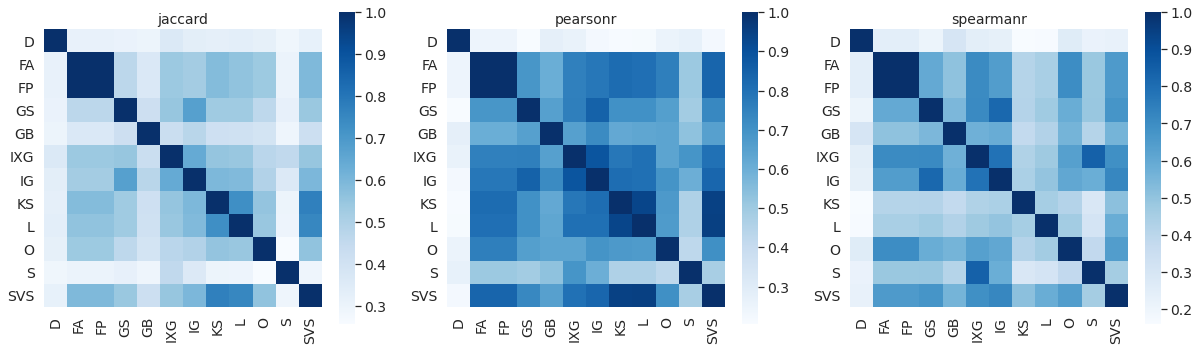

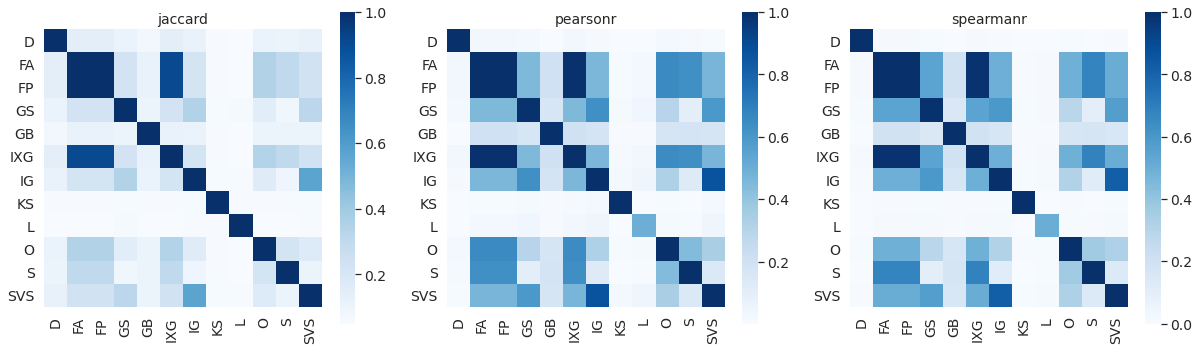

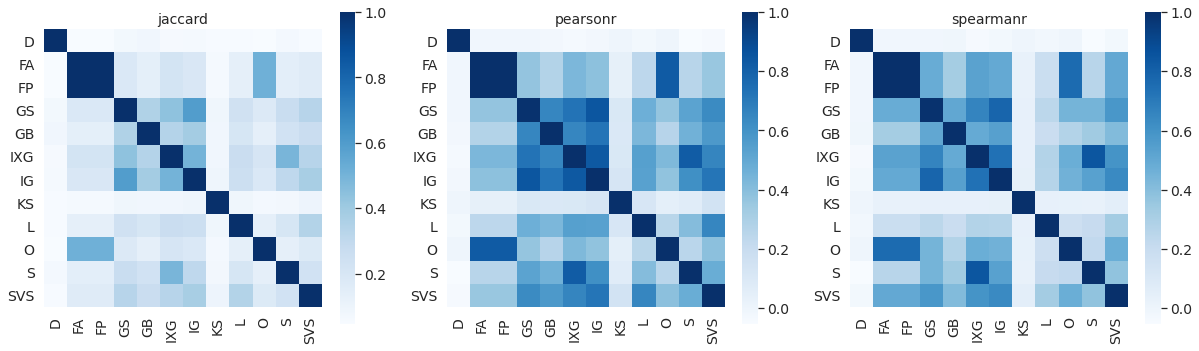

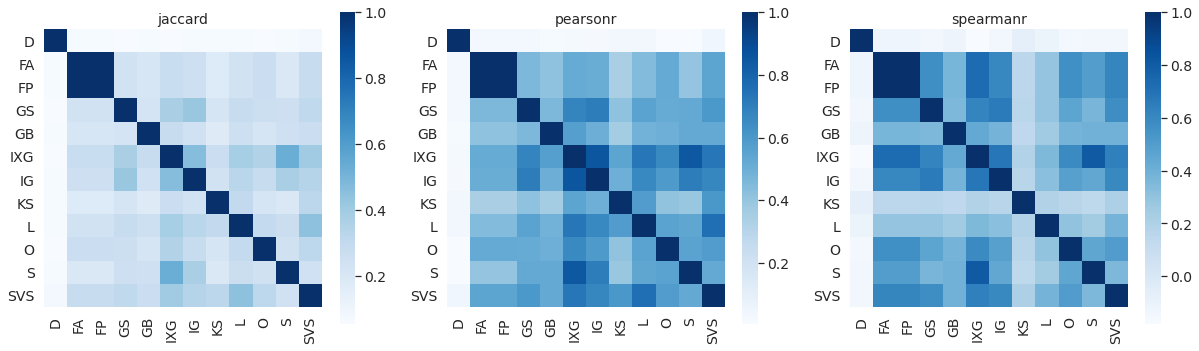

In [5]:
for d in ['CharacterTrajectories', 'FordA', 'FaceDetection']:
    fig, ax = plt.subplots(figsize=(17, 5), nrows=1, ncols=3)
    axes = ax.flat

    for i, key in enumerate(list(corr_values[d])):
        axes[i].set_title(key.split('_')[0])
        short_names = {}
        for s in list(corr_values[d][key]):
            short_names[s] = ''
            for l in s:
                if l.isupper():
                    short_names[s] += l
        corr_pd = pd.DataFrame(data=corr_values[d][key], index=list(corr_values[d][key]), columns=list(corr_values[d][key]))
        corr_pd = corr_pd.rename(columns=short_names, index=short_names)
        mask = 0# 1 - np.triu(np.ones_like(corr_pd, dtype=bool))
        sns.heatmap(corr_pd, mask=mask, xticklabels=corr_pd.columns, yticklabels=corr_pd.columns, annot=False, fmt='.2f', cmap='Blues', square=True, ax=axes[i])
        
    for i in range(len(list(corr_values[d])), 3):
        axes[i].set_visible(False)

    fig.tight_layout()

    fname = os.path.join(paper_folder, 'Correlation_matrix_' + d + '.png')
    fig.savefig(fname, dpi=300, bbox_inches='tight', pad_inches=0.1)

    plt.show()

In [23]:
corr_values = {}
conf = 'spearmanr_perc-10.0'
for dataset in sorted(results):
    print(dataset)
    #display(Image(os.path.join(results[dataset], 'Correlation_pearsonr_perc-10.0.png')))
    dataset_real = dataset
    if dataset == 'anomaly_new':
        dataset = 'Anomaly'
    corr_values[dataset] = {}
    setting = 'Correlation_' +  conf + '.txt'
    with open(os.path.join(results[dataset_real], setting), 'r') as f:
        corr_values[dataset] = json.loads(str(f.readline().replace('\'', '\"').replace('nan', '-1')[1:-1]))

CharacterTrajectories
ECG5000
FaceDetection
FordA
UWaveGestureLibraryAll
anomaly_new


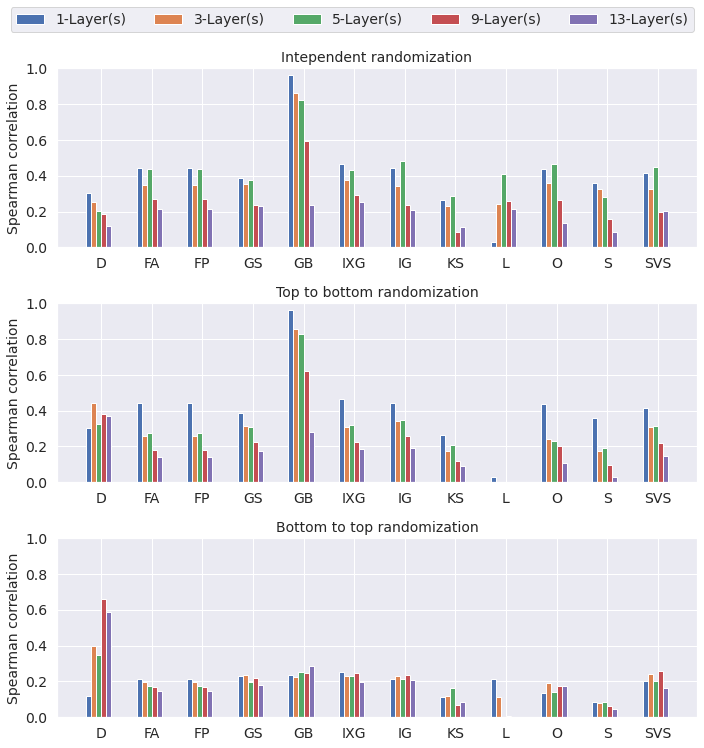

In [24]:
for d in ['CharacterTrajectories']:
    fig, ax = plt.subplots(figsize=(10, 10), nrows=3, ncols=1)
    axes = ax
    methods = sorted(corr_values[d])
    setups = sorted(corr_values[d][methods[0]])[2:]
    titles = ['Independent randomization', 'Top to bottom randomization', 'Bottom to top randomization']
    x = np.arange(len(methods))
    width = 0.1
    for col, cm in enumerate(['Ri', 'Rt', 'Rb']):
        vals = []
        for mid, setup in enumerate(setups):
            if cm not in setup:
                continue
            vals.append([corr_values[d][m][setup] for m in methods])
            off = (-width/2 * len(setups)/3) + (mid % (len(setups)/3)) * width
            if col == 0:
                axes[col].bar(x + off, vals[-1], width, label=str(int(setup.split('Ri')[-1])) + '-Layer(s)')
            else:
                axes[col].bar(x + off, vals[-1], width)
            
        axes[col].set_ylim(0,1)
        axes[col].set_ylabel('Spearman correlation')
        axes[col].set_title(titles[col])
        axes[col].set_xticks(x)
        
        short_names = []
        for s in methods:
            short_names.append('')
            for l in s:
                if l.isupper():
                    short_names[-1] += l
        axes[col].set_xticklabels(short_names)

    fig.legend(loc='upper center', bbox_to_anchor=(.5, 1.05), ncol=len(setups))
    fig.tight_layout()    

    fname = os.path.join(paper_folder, 'Correlation_' + d + '.png')
    fig.savefig(fname, dpi=300, bbox_inches='tight', pad_inches=0.1)

    plt.show()

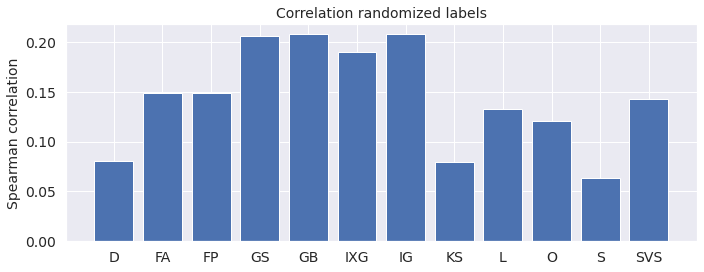

In [25]:
for d in ['CharacterTrajectories']:
    fig, ax = plt.subplots(figsize=(10, 4))
    methods = sorted(corr_values[d])
    x = np.arange(len(methods))
    vals = [corr_values[d][m]['D'] for m in methods]
    ax.bar(x , vals)
    ax.set_ylabel('Spearman correlation')
    ax.set_title('Correlation randomized labels')
    ax.set_xticks(x)
        
    short_names = []
    for s in methods:
        short_names.append('')
        for l in s:
            if l.isupper():
                short_names[-1] += l
    ax.set_xticklabels(short_names)
    fig.tight_layout()    

    fname = os.path.join(paper_folder, 'Correlation_data_' + d + '.png')
    fig.savefig(fname, dpi=300, bbox_inches='tight', pad_inches=0.1)

    plt.show()

In [27]:
#sys.path.append('../')
from modules.datasets import pkl_loader
d_path = '../../data/anomaly_new/dataset.pickle'
_, _, _, _, testX, testY = pkl_loader.load_data(d_path, is_channel_first=False)
sub_ids = [  0,   1,   2,   3,   4,   5,   7,   8,   9,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  23,  24,  27,  28,  29,  31,
        32,  33,  34,  35,  36,  37,  38,  39,  40,  42,  43,  44,  45,
        46,  47,  48,  51,  52,  53,  54,  55,  57,  58,  59,  63,  64,
        66,  67,  68,  70,  71,  72,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  86,  87,  88,  89,  90,  91,  93,  94,  96,
        97,  99, 100, 101, 102,   6,  10,  22,  25,  26,  30,  41,  49,
        50,  56,  60,  61,  62,  65,  69,  73,  85]
sub_test = testX[sub_ids].transpose(0,2,1)

/home/mercier/workspace/attribution-masking/timereise/src/notebooks/../modules/attributions/attribution_comparer.py:243: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


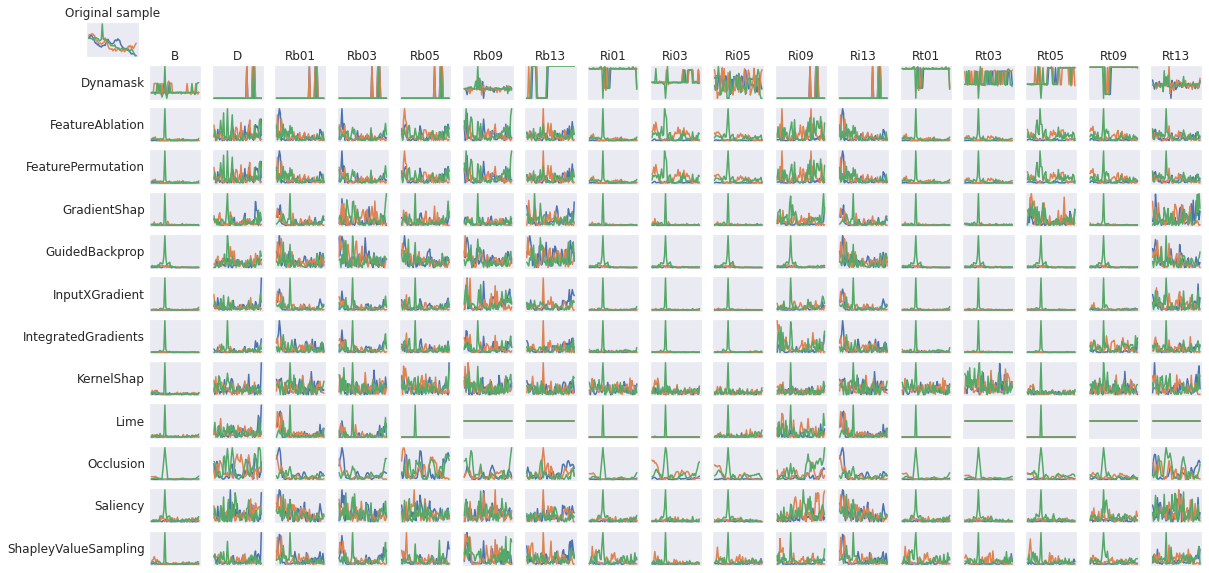

In [28]:
from modules.attributions.attribution_comparer import (AttributionComparer, gather_all_attrs, shorten_attr_names)
attr_paths = gather_all_attrs('anomaly_new', exp_names=['baseline', 'randomized_data'], architectures=None, 
    attr_paths='100', attr_names=None, exclude=None)
attr_names = shorten_attr_names(attr_paths)
attrComparer = AttributionComparer()
attrComparer.load_attributions(attr_paths, attr_names)
attrComparer.group_by_method()
attrComparer.plot_grid(sub_test, 83, save_path=os.path.join(paper_folder))

In [29]:
cont_values = {}
for dataset in sorted(results):
    print(dataset)
    #display(Image(os.path.join(results[dataset], 'Attribution_continuity.png')))
    dataset_real = dataset
    if dataset == 'anomaly_new':
        dataset = 'Anomaly'
    cont_values[dataset] = {}
    setting = 'Attribution_continuity.txt'
    with open(os.path.join(results[dataset_real], setting), 'r') as f:
        cont_values[dataset] = json.loads(str(f.readline().replace('\'', '\"')[1:-1]))

CharacterTrajectories
ECG5000
FaceDetection
FordA
UWaveGestureLibraryAll
anomaly_new


In [30]:
tab_str = 'Method & '
for d in sorted(cont_values):
    tab_str = tab_str + d + ' & '
tab_str = tab_str[:-2] + '\\\\\n'
for m in sorted(cont_values[d]):
    tab_str = tab_str + m + ' & '
    for d in sorted(cont_values):
        tab_str = tab_str + '${:.4f}$'.format(cont_values[d][m]) + ' & '
    tab_str = tab_str[:-2] + '\\\\\n'
print(tab_str)

Method & Anomaly & CharacterTrajectories & ECG5000 & FaceDetection & FordA & UWaveGestureLibraryAll \\
Dynamask & $0.0282$ & $0.0014$ & $0.0252$ & $0.0107$ & $0.0159$ & $0.0015$ \\
FeatureAblation & $0.0784$ & $0.0395$ & $0.0584$ & $0.0624$ & $0.0815$ & $0.0601$ \\
FeaturePermutation & $0.0784$ & $0.0395$ & $0.0584$ & $0.0624$ & $0.0815$ & $0.0601$ \\
GradientShap & $0.0947$ & $0.0368$ & $0.0616$ & $0.0613$ & $0.0813$ & $0.0543$ \\
GuidedBackprop & $0.1201$ & $0.0537$ & $0.0913$ & $0.0957$ & $0.0801$ & $0.0526$ \\
InputXGradient & $0.0801$ & $0.0390$ & $0.0508$ & $0.0620$ & $0.0855$ & $0.0537$ \\
IntegratedGradients & $0.0864$ & $0.0369$ & $0.0609$ & $0.0632$ & $0.0858$ & $0.0508$ \\
KernelShap & $0.1423$ & $0.1086$ & $0.0641$ & $0.1671$ & $0.1973$ & $0.1795$ \\
Lime & $0.1122$ & $0.0496$ & $0.0498$ & $0.0010$ & $0.0883$ & $0.0928$ \\
Occlusion & $0.0623$ & $0.0183$ & $0.0419$ & $0.0367$ & $0.0535$ & $0.0284$ \\
Saliency & $0.1176$ & $0.0748$ & $0.1439$ & $0.1170$ & $0.1229$ & $0.0842$

In [60]:
agree_values = {}
for dataset in sorted(results):
    print(dataset)
    #display(Image(os.path.join(results[dataset], 'Modified_Agreement_Matrix.png')))
    dataset_real = dataset
    if dataset == 'anomaly_new':
        dataset = 'Anomaly'
    agree_values[dataset] = {}
    setting = 'Modified_Agreement_Matrix.txt'
    with open(os.path.join(results[dataset_real], setting), 'r') as f:
        agree_values[dataset] = json.loads(str(f.readline().replace('\'', '\"')[1:-1]))

CharacterTrajectories
ECG5000
FaceDetection
FordA
UWaveGestureLibraryAll
anomaly_new


In [61]:
tab_str = 'Method & '
for d in sorted(agree_values):
    tab_str = tab_str + d + ' & '
tab_str = tab_str[:-2] + '\\\\\n'
for agree in sorted(agree_values):
    for a in agree_values[d]['larger']['agree']:
        tab_str = tab_str + ' & ' + '${:.0f}$'.format(a)
tab_str = tab_str + ' \\\\\n'
for m in sorted(agree_values[d]['larger']['ratios']):
    tab_str = tab_str + m + ' & '
    for d in sorted(agree_values):
        for v in agree_values[d]['larger']['ratios'][m]:
            tab_str = tab_str + '${:.0f}$'.format(v) + ' & '
    tab_str = tab_str[:-2] + '\\\\\n'
print(tab_str)

Method & Anomaly & CharacterTrajectories & ECG5000 & FaceDetection & FordA & UWaveGestureLibraryAll \\
 & $90$ & $95$ & $100$ & $90$ & $95$ & $100$ & $90$ & $95$ & $100$ & $90$ & $95$ & $100$ & $90$ & $95$ & $100$ & $90$ & $95$ & $100$ \\
Dynamask & $1$ & $5$ & $100$ & $55$ & $72$ & $92$ & $18$ & $31$ & $100$ & $100$ & $100$ & $100$ & $50$ & $71$ & $100$ & $61$ & $74$ & $98$ \\
FeatureAblation & $1$ & $2$ & $48$ & $15$ & $20$ & $28$ & $6$ & $9$ & $60$ & $25$ & $30$ & $35$ & $44$ & $52$ & $82$ & $26$ & $55$ & $99$ \\
FeaturePermutation & $1$ & $2$ & $48$ & $15$ & $20$ & $28$ & $6$ & $9$ & $60$ & $25$ & $30$ & $35$ & $44$ & $52$ & $82$ & $26$ & $55$ & $99$ \\
GradientShap & $1$ & $44$ & $97$ & $15$ & $18$ & $32$ & $15$ & $20$ & $75$ & $60$ & $71$ & $98$ & $69$ & $77$ & $96$ & $12$ & $38$ & $100$ \\
GuidedBackprop & $1$ & $76$ & $98$ & $17$ & $27$ & $45$ & $13$ & $14$ & $83$ & $2$ & $2$ & $5$ & $33$ & $61$ & $98$ & $11$ & $16$ & $100$ \\
InputXGradient & $1$ & $51$ & $92$ & $16$ & $21$ & 

In [72]:
import pickle
base_accs = {}
for dataset in sorted(results):
    print(dataset)
    dataset_real = dataset
    if dataset == 'anomaly_new':
        dataset = 'Anomaly'
    base_accs[dataset] = {}
    setting_base = 'AlexNet_batch-32_run-0_report.pickle'
    setting_subset = 'acc_report.pickle'
    with open(os.path.join(result_root, dataset_real, setting_base), 'rb') as f:
        base_accs[dataset] = {'base': pickle.load(f)['weighted avg']['f1-score'], 'subset': None}
    with open(os.path.join(results[dataset_real], setting_subset), 'rb') as f:
        base_accs[dataset]['subset'] = pickle.load(f)['weighted avg']['f1-score']

CharacterTrajectories
ECG5000
FaceDetection
FordA
UWaveGestureLibraryAll
anomaly_new


In [79]:
tab_str = 'Dataset & Test & Attr. Subset \\\\\n'
for d in sorted(base_accs):
    tab_str = tab_str + d + ' & ${:.4f}$ & ${:.4f}$ \\\\\n'.format(base_accs[d]['base'], base_accs[d]['subset'])
print(tab_str)

Dataset & Test & Attr. Subset \\
Anomaly & $0.9801$ & $0.9464$ \\
CharacterTrajectories & $0.9930$ & $1.0000$ \\
ECG5000 & $0.9352$ & $0.8907$ \\
FaceDetection & $0.5956$ & $0.7097$ \\
FordA & $0.9204$ & $0.9400$ \\
UWaveGestureLibraryAll & $0.9318$ & $0.9802$ \\

